# SymPy Tutorial

*Arthur Ryman* <br/>
*Last Updated: 2020-04-13*


This notebook contains the examples from the 
[SymPy Tutorial](https://docs.sympy.org/latest/tutorial/index.html).

## Preliminaries

### Installation

The following example confirms that SymPy is installed correctly.

In [1]:
from sympy import *
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

The above example shows that SymPy is very nicely integrated with Jupyter. 
The expression is printed as a properly typeset mathematical equation.
I assume that Jupyter sets the default pretty printer to LaTeX.

## Introduction

### What is Symbolic Computation?

In [2]:
import math
math.sqrt(9)

3.0

In [3]:
math.sqrt(8)

2.8284271247461903

In [4]:
import sympy
sympy.sqrt(3)

sqrt(3)

In [5]:
sympy.sqrt(8)

2*sqrt(2)

In [6]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [7]:
expr + 1

x + 2*y + 1

In [8]:
expr - x

2*y

In [9]:
x*expr

x*(x + 2*y)

In [10]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [11]:
factor(expanded_expr)

x*(x + 2*y)

### The Power of Symbolic Computation

In [12]:
from sympy import *
x, t, z, nu = symbols('x t z nu')

In [13]:
init_printing(use_unicode=True)

In [14]:
diff(sin(x)*exp(x), x)

In [15]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

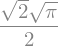

In [16]:
integrate(sin(x**2), (x, -oo, oo))

In [17]:
limit(sin(x)/x, x, 0)

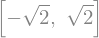

In [18]:
solve(x**2 -2, x)

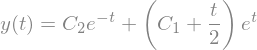

In [19]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

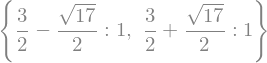

In [20]:
Matrix([[1, 2], [2, 2]]).eigenvals()

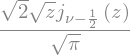

In [21]:
besselj(nu, z).rewrite(jn)

In [22]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

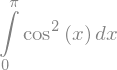

In [23]:
Integral(cos(x)**2, (x, 0, pi))

In [24]:
latex_1 = latex(Integral(cos(x)**2, (x, 0, pi)))
print(latex_1)

\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


### Why SymPy?

## Gotchas

### Symbols

In [25]:
from sympy import *

In [26]:
x + 1

In [27]:
x = symbols('x')
x + 1

In [28]:
x, y, z = symbols('x y z')

In [29]:
a, b = symbols('b a')
a

In [30]:
b

In [31]:
crazy = symbols('unrelated')
crazy + 1

In [32]:
print(latex(crazy))

unrelated


In [33]:
x = symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


In [34]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [35]:
x = 'ABC'
expr

'abcdef'

In [36]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

### Equal signs

In [37]:
x + 1 == 4

False

In [38]:
Eq(x + 1, 4)

In [39]:
(x + 1)**2 == x**2 + 2*x + 1

False

In [40]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [41]:
c = x**2 - 2*x + 1
simplify(a - c)

In [42]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

In [43]:
simplify(a - b)

### Two Final Notes: ^ and /

In [44]:
True ^ False

True

In [45]:
True ^ True

False

In [46]:
Xor(x, y)

In [47]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [48]:
type(1 + 1)

int

In [49]:
Integer(1)/Integer(3)

In [50]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

In [51]:
1/3

In [52]:
from __future__ import division
1/2

In [53]:
1//2

In [54]:
Rational(1, 2)

In [55]:
x + 1/2

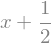

In [56]:
x + Rational(1,2)

 ### Further Reading

## Basic Operations

In [57]:
from sympy import *
x, y, z = symbols('x y z')

 ### Substitution

In [58]:
expr = cos(x) + 1
expr.subs(x, y)

In [59]:
expr.subs(x, 0)

In [60]:
expr = x**y
expr

In [61]:
expr = expr.subs(y, x**y)
expr

In [62]:
expr = expr.subs(y, x**x)
expr

In [63]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [64]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

In [65]:
expr = cos(x)
expr.subs(x, 0)

In [66]:
expr

In [67]:
x

In [68]:
expr = x**3 + 4*x*y -z
expr.subs([(x, 2), (y, 4), (z, 0)])

In [69]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

### Converting Strings to SymPy Expression

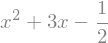

In [70]:
str_expr = 'x**2 + 3*x - 1/2'
expr = sympify(str_expr)
expr

In [71]:
expr.subs(x, 2)

### evalf

In [72]:
expr = sqrt(8)
expr.evalf()

In [73]:
pi.evalf(100)

In [74]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

In [75]:
one = cos(1)**2 + sin(1)**2
(one -1).evalf()

In [76]:
(one -1).evalf(chop=True)

### lambdify

In [77]:
import numpy
a = numpy.arange(10)
expr = sin(x)
f = lambdify(x, expr, 'numpy')
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [78]:
f = lambdify(x, expr, 'math')
f(0.1)

In [79]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x
f = lambdify(x, expr, {'sin': mysin})
f(0.1)

## Printing

### Printers

### Setting up Pretty Printing

In [80]:
from sympy import init_printing
init_printing()

In [81]:
from sympy import init_session
init_session()

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [82]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()

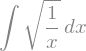

In [83]:
Integral(sqrt(1/x), x)

### Printing Functions

#### str

In [84]:
from sympy import *
x, y, z = symbols('x y z')
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

In [85]:
print(Integral(sqrt(1/x), x))

Integral(sqrt(1/x), x)


#### srepr

In [86]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

#### ASCII Pretty Printer

In [87]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [88]:
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [89]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


#### Unicode Pretty Printer

In [90]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


#### Latex

In [91]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


#### MathML

In [92]:
from sympy.printing.mathml import print_mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



#### Dot

In [93]:
from sympy.printing.dot import dotprint
from sympy.abc import x
print(dotprint(x+2))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Integer(2), Symbol('x'))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Integer(2)_(0,)" ["color"="black", "label"="2", "shape"="ellipse"];
"Symbol('x')_(1,)" ["color"="black", "label"="x", "shape"="ellipse"];

#########
# Edges #
#########

"Add(Integer(2), Symbol('x'))_()" -> "Integer(2)_(0,)";
"Add(Integer(2), Symbol('x'))_()" -> "Symbol('x')_(1,)";
}
